## Donut

### Data Preprocessing

Donut desires folloling Data Structure:

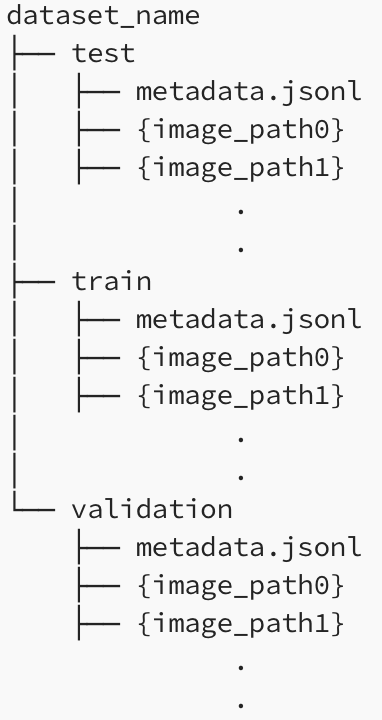

#### Create that Structure

In [2]:
import os
import json
import shutil
import random
from tqdm.notebook import tqdm
import numpy as np

define function to remove irrelevant data. The bbox attribute also has to be removed because it's not of the type "string". Instead of changing the type of bbox it is removed

In [5]:
def remove_bboxes(data):
    data.pop("metadata")
    for item in data['field_extractions']:
        item.pop('bbox', None)
        item.pop('page', None)

# Remove 'bbox' and 'page' keys from dictionaries within 'line_item_extractions' list
    for item in data['line_item_extractions']:
        item.pop('bbox', None)
        item.pop('page', None)
    for item in data['line_item_headers']:
        item.pop('bbox', None)
        item.pop('page', None)
        
    return data

## First method created a dataset with x random images

Create ~150 train examples

In [6]:
import pprint

dir = "/home/sebastian/Documents/Hauptprojekt/Daten_Donut_random/train/"
for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

lines = []
images = []
trainrandomlabels = []

all_images = os.listdir("/home/sebastian/Documents/Hauptprojekt/Daten/data/docile/annotations/")
random.shuffle(all_images)
counter = 0
mod_tax = 10
mod_order = 5
for ann in tqdm(all_images):
    if counter == 10389:
        break
    if ann != ".ipynb_checkpoints":
        with open("/home/sebastian/Documents/Hauptprojekt/Daten/data/docile/annotations/" + ann) as f:
            data = json.load(f)
            if data["metadata"]["page_count"] == 1: 
                label = data["metadata"]["document_type"] 
                trainrandomlabels.append(label)
                data = remove_bboxes(data)
                #print(data)
                images.append(ann[:-5] + "(" + "1" + ")" + ".jpg")
                line = {"gt_parse": data}
                lines.append(line)
                
                counter+=1
#print(lines)
print(len(images))
with open("/home/sebastian/Documents/Hauptprojekt/Daten_Donut_random/train/metadata.jsonl", 'w') as f:
    for i, gt_parse in enumerate(lines):
        line = {"file_name": images[i], "ground_truth": json.dumps(gt_parse)}
        f.write(json.dumps(line) + "\n")
        shutil.copyfile("/home/sebastian/Documents/Hauptprojekt/Daten/data/docile/jpgs/" + images[i], "/home/sebastian/Documents/Hauptprojekt/Daten_Donut_random/train/" + images[i])
        
np.save("/home/sebastian/Documents/Hauptprojekt/Arrays/DonutInfoExtraction/trainrandomlabels.npy", trainrandomlabels)

  0%|          | 0/105680 [00:00<?, ?it/s]

10389


create ~30 test examples

In [31]:
dir = "/home/sebastian/Documents/Hauptprojekt/Daten_Donut_random/test/"
for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

lines = []
images = []
    
all_images = os.listdir("/home/sebastian/Documents/Hauptprojekt/Daten/data/docile/annotations/")
random.shuffle(all_images)
counter = 0
for ann in tqdm(all_images):
    if counter == 600:
        break
    if ann != ".ipynb_checkpoints":
        with open("/home/sebastian/Documents/Hauptprojekt/Daten/data/docile/annotations/" + ann) as f:
            data = json.load(f)
            if data["metadata"]["page_count"] == 1:       
                data = remove_bboxes(data)
                #print(data)
                images.append(ann[:-5] + "(" + "1" + ")" + ".jpg")
                line = {"gt_parse": data}
                lines.append(line)
                counter+=1
#print(lines)
print(len(images))
with open("/home/sebastian/Documents/Hauptprojekt/Daten_Donut_random2test/metadata.jsonl", 'w') as f:
    for i, gt_parse in enumerate(lines):
        line = {"file_name": images[i], "ground_truth": json.dumps(gt_parse)}
        f.write(json.dumps(line) + "\n")
        shutil.copyfile("/home/sebastian/Documents/Hauptprojekt/Daten/data/docile/jpgs/" + images[i], "/home/sebastian/Documents/Hauptprojekt/Daten_Donut_random/test/" + images[i])

  0%|          | 0/105680 [00:00<?, ?it/s]

600


create ~30 validation exapmles

In [33]:
dir = "/home/sebastian/Documents/Hauptprojekt/Daten_Donut_random/val/"
for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))
    
lines = []
images = []

all_images = os.listdir("/home/sebastian/Documents/Hauptprojekt/Daten/data/docile/annotations/")
random.shuffle(all_images)
counter = 0
for ann in tqdm(all_images):
    if counter == 50:
        break
    if ann != ".ipynb_checkpoints":
        with open("/home/sebastian/Documents/Hauptprojekt/Daten/data/docile/annotations/" + ann) as f:
            data = json.load(f)
            if data["metadata"]["page_count"] == 1:       
                data = remove_bboxes(data)
                #print(data)
                images.append(ann[:-5] + "(" + "1" + ")" + ".jpg")
                line = {"gt_parse": data}
                lines.append(line)
                counter+=1
#print(lines)
print(len(images))
with open("/home/sebastian/Documents/Hauptprojekt/Daten_Donut_random/val/metadata.jsonl", 'w') as f:
    for i, gt_parse in enumerate(lines):
        line = {"file_name": images[i], "ground_truth": json.dumps(gt_parse)}
        f.write(json.dumps(line) + "\n")
        shutil.copyfile("/home/sebastian/Documents/Hauptprojekt/Daten/data/docile/jpgs/" + images[i], "/home/sebastian/Documents/Hauptprojekt/Daten_Donut_random/val/" + images[i])

  0%|          | 0/105680 [00:00<?, ?it/s]

50


## 2nd method creates dataset and makes sure every class is represented in each set

In [8]:
import pprint
dir = "/home/sebastian/Documents/Hauptprojekt/Daten_Donut_all_classes2/train/"
for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))



lines = []
images = []
labels = []

all_images = "/home/sebastian/Documents/Hauptprojekt/Daten_sorted/"
ann_path = "/home/sebastian/Documents/Hauptprojekt/Daten/data/docile/annotations/"
counter = 0
mod_tax = 15
mod_order = 8
counter_order = 0
counter_tax = 0


for folder_name in os.listdir(all_images):
    folder_path = os.path.join(all_images, folder_name)
    print(folder_name)
    if folder_name == "tax_invoice":
        mod10len = int(sum(1 for _ in os.listdir(folder_path))* (1/mod_tax))
        mod10trainlen = int(mod10len * 0.7)
        print(mod10trainlen)
        for image_name in os.listdir(folder_path):
            if counter_tax == mod10trainlen:
                break
            with open(ann_path + image_name[:-7] + ".json") as f:
                data = json.load(f)
                if data["metadata"]["page_count"] == 1:
                    label = data["metadata"]["document_type"]
                    labels.append(label)
                    data = remove_bboxes(data)
                    #print(data)
                    images.append(image_name)
                    line = {"gt_parse": data}
                    lines.append(line)
                    counter_tax += 1
                    
    elif folder_name == "order":
        mod5len = int(sum(1 for _ in os.listdir(folder_path))* (1/mod_order))
        mod5trainlen = int(mod5len * 0.7)
        print(mod5trainlen)
        for image_name in os.listdir(folder_path):
            if counter_order == mod5trainlen:
                break
            with open(ann_path + image_name[:-7] + ".json") as f:
                data = json.load(f)
                if data["metadata"]["page_count"] == 1:
                    label = data["metadata"]["document_type"]
                    labels.append(label)
                    data = remove_bboxes(data)
                    #print(data)
                    images.append(image_name)
                    line = {"gt_parse": data}
                    lines.append(line)
                    counter_order += 1


    else:
        counter = 0
        num_images = int(sum(1 for _ in os.listdir(folder_path)))
        num_trainimages = int(num_images * 0.7)
        print(num_trainimages)
        for image_name in os.listdir(folder_path):
            if counter == num_trainimages:
                break
            with open(ann_path + image_name[:-7] + ".json") as f:
                data = json.load(f)
                if data["metadata"]["page_count"] == 1:
                    label = data["metadata"]["document_type"]
                    labels.append(label)
                    data = remove_bboxes(data)
                    #print(data)
                    images.append(image_name)
                    line = {"gt_parse": data}
                    lines.append(line)
                    counter += 1

with open("/home/sebastian/Documents/Hauptprojekt/Daten_Donut_all_classes2/train/metadata.jsonl", 'w') as f:
    for i, gt_parse in enumerate(lines):
        line = {"file_name": images[i], "ground_truth": json.dumps(gt_parse)}
        f.write(json.dumps(line) + "\n")
        shutil.copyfile("/home/sebastian/Documents/Hauptprojekt/Daten/data/docile/jpgs/" + images[i], "/home/sebastian/Documents/Hauptprojekt/Daten_Donut_all_classes2/train/" + images[i])
        
np.save("/home/sebastian/Documents/Hauptprojekt/Arrays/DonutInfoExtraction/trainlabels2.npy", labels)

sales_order
1485
purchase_order
2217
utility_bill
12
debit_note
4
order
2452
receipt
784
proforma
23
tax_invoice
3399
credit_note
24


In [121]:
import pprint
dir = "/home/sebastian/Documents/Hauptprojekt/Daten_Donut_all_classes/test/"
for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))



lines = []
images = []
labels = []

all_images = "/home/sebastian/Documents/Hauptprojekt/Daten_sorted/"
ann_path = "/home/sebastian/Documents/Hauptprojekt/Daten/data/docile/annotations/"
counter = 0
mod_tax = 10
mod_order = 5
counter_order = 0
counter_tax = 0

for folder_name in os.listdir(all_images):
    folder_path = os.path.join(all_images, folder_name)
    print(folder_name)
    if folder_name == "tax_invoice":
        mod10len = int(sum(1 for _ in os.listdir(folder_path))* (1/mod_tax))
        mod10trainlen = int(mod10len * 0.7)
        mod10testlen = int(mod10len * 0.9)
        print(mod10testlen-mod10trainlen)
        print
        for image_name in os.listdir(folder_path):
            if counter_tax == mod10testlen:
                break
            if counter_tax > mod10trainlen and counter_tax < mod10testlen:
                with open(ann_path + image_name[:-7] + ".json") as f:
                    data = json.load(f)
                    if data["metadata"]["page_count"] == 1:
                        label = data["metadata"]["document_type"]
                        labels.append(label)
                        data = remove_bboxes(data)
                        #print(data)
                        images.append(image_name)
                        line = {"gt_parse": data}
                        lines.append(line)
            counter_tax += 1

                    
    elif folder_name == "order":
        mod5len = int(sum(1 for _ in os.listdir(folder_path))* (1/mod_order))
        mod5trainlen = int(mod5len * 0.7)
        mod5testlen = int(mod5len * 0.9)
        for image_name in os.listdir(folder_path):
            if counter_order == mod5testlen:
                break
            if counter_order > mod5trainlen and counter_order < mod5testlen:
                with open(ann_path + image_name[:-7] + ".json") as f:
                    data = json.load(f)
                    if data["metadata"]["page_count"] == 1:
                        label = data["metadata"]["document_type"]
                        labels.append(label)
                        data = remove_bboxes(data)
                        #print(data)
                        images.append(image_name)
                        line = {"gt_parse": data}
                        lines.append(line)
            counter_order += 1

    else:
        counter = 0
        num_images = int(sum(1 for _ in os.listdir(folder_path)))
        num_trainimages = int(num_images * 0.7)
        num_testimages = int(num_images * 0.9)
        for image_name in os.listdir(folder_path):
            if counter == num_testimages:
                break
            if counter > num_trainimages and counter < num_testimages:
                with open(ann_path + image_name[:-7] + ".json") as f:
                    data = json.load(f)
                    if data["metadata"]["page_count"] == 1:
                        label = data["metadata"]["document_type"]
                        labels.append(label)
                        data = remove_bboxes(data)
                        #print(data)
                        images.append(image_name)
                        line = {"gt_parse": data}
                        lines.append(line)
            counter += 1

with open("/home/sebastian/Documents/Hauptprojekt/Daten_Donut_all_classes/test/metadata.jsonl", 'w') as f:
    for i, gt_parse in enumerate(lines):
        line = {"file_name": images[i], "ground_truth": json.dumps(gt_parse)}
        f.write(json.dumps(line) + "\n")
        shutil.copyfile("/home/sebastian/Documents/Hauptprojekt/Daten/data/docile/jpgs/" + images[i], "/home/sebastian/Documents/Hauptprojekt/Daten_Donut_all_classes/test/" + images[i])
        
np.save("/home/sebastian/Documents/Hauptprojekt/Arrays/DonutInfoExtraction/testlabels.npy", labels)

sales_order
purchase_order
utility_bill
debit_note
order
receipt
proforma
tax_invoice
1457
credit_note


In [122]:
print(len(images))

3754


In [123]:
len(labels)

3754

In [117]:
import pprint
dir = "/home/sebastian/Documents/Hauptprojekt/Daten_Donut_all_classes/val/"
for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))



lines = []
images = []
labels = []

all_images = "/home/sebastian/Documents/Hauptprojekt/Daten_sorted/"
ann_path = "/home/sebastian/Documents/Hauptprojekt/Daten/data/docile/annotations/"
counter = 0
mod_tax = 30
mod_order = 20
counter_order = 0
counter_tax = 0

for folder_name in os.listdir(all_images):
    folder_path = os.path.join(all_images, folder_name)
    print(folder_name)
    if folder_name == "tax_invoice":
        mod10len = int(sum(1 for _ in os.listdir(folder_path))* (1/mod_tax))
        mod10trainlen = int(mod10len * 0.7)
        mod10testlen = int(mod10len * 0.9)
        mod10vallen = int(mod10len * 0.95)
        mod10vallen = mod10testlen + 70
        print(mod10vallen-mod10testlen)
        for image_name in os.listdir(folder_path):
            if counter_tax > mod10vallen:
                break
            if counter_tax > mod10testlen and counter_tax < mod10vallen:
                with open(ann_path + image_name[:-7] + ".json") as f:
                    data = json.load(f)
                    if data["metadata"]["page_count"] == 1:
                        label = data["metadata"]["document_type"]
                        labels.append(label)
                        data = remove_bboxes(data)
                        images.append(image_name)
                        line = {"gt_parse": data}
                        lines.append(line)
            counter_tax += 1

                    
    elif folder_name == "order":
        mod5len = int(sum(1 for _ in os.listdir(folder_path))* (1/mod_order))
        mod5trainlen = int(mod5len * 0.7)
        mod5testlen = int(mod5len * 0.9)
        mod5vallen = int(mod5len * 0.95)
        mod5vallen = mod5testlen + 55
        print(mod5vallen-mod5testlen)
        
        for image_name in os.listdir(folder_path):
            if counter_order > mod5vallen:
                break
            if counter_order > mod5testlen and counter_order < mod5vallen:
                with open(ann_path + image_name[:-7] + ".json") as f:
                    data = json.load(f)
                    if data["metadata"]["page_count"] == 1:
                        label = data["metadata"]["document_type"]
                        labels.append(label)
                        data = remove_bboxes(data)
                        #print(data)
                        images.append(image_name)
                        line = {"gt_parse": data}
                        lines.append(line)
            counter_order += 1

    else:
        counter = 0
        num_images = int(sum(1 for _ in os.listdir(folder_path)))
        num_trainimages = int(num_images * 0.7)
        num_testimages = int(num_images * 0.9)
        num_valimages = int(num_images * 0.95)
        if folder_name in ["debit_note", "utility_bill", "credit_note", "proforma"]:
            num_testimages = 0 
            num_valimages = 2
        if folder_name == "credit_note":
            print(num_testimages)
            print(num_valimages)
        if folder_name == "purchase_order" or folder_name == "sales_order" or folder_name == "receipt":
            num_valimages = num_testimages + 40       
        print(num_valimages-num_testimages)
        for image_name in os.listdir(folder_path):
            if counter > num_valimages:
                break
            if counter >= num_testimages and counter < num_valimages:
                with open(ann_path + image_name[:-7] + ".json") as f:
                    data = json.load(f)
                    if data["metadata"]["page_count"] == 1:
                        label = data["metadata"]["document_type"]
                        labels.append(label)
                        data = remove_bboxes(data)
                        #print(data)
                        images.append(image_name)
                        line = {"gt_parse": data}
                        lines.append(line)
                    else:
                        counter -= 1
            counter += 1

with open("/home/sebastian/Documents/Hauptprojekt/Daten_Donut_all_classes/val/metadata.jsonl", 'w') as f:
    for i, gt_parse in enumerate(lines):
        line = {"file_name": images[i], "ground_truth": json.dumps(gt_parse)}
        f.write(json.dumps(line) + "\n")
        shutil.copyfile("/home/sebastian/Documents/Hauptprojekt/Daten/data/docile/jpgs/" + images[i], "/home/sebastian/Documents/Hauptprojekt/Daten_Donut_all_classes/val/" + images[i])

np.save("/home/sebastian/Documents/Hauptprojekt/Arrays/DonutInfoExtraction/vallabels.npy", labels)

sales_order
40
purchase_order
40
utility_bill
2
debit_note
2
order
55
receipt
40
proforma
2
tax_invoice
70
credit_note
0
2
2


In [118]:
print(len(images))


250


In [119]:
len(labels)

250

In [115]:
print(labels)

['sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'sales_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'purchase_order', 'pu

<Figure size 1000x600 with 0 Axes>

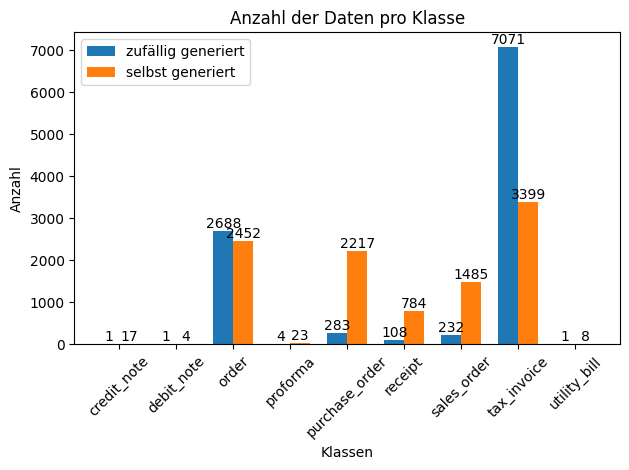

In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))

random_trainlabels = np.load("/home/sebastian/Documents/Hauptprojekt/Arrays/DonutInfoExtraction/trainrandomlabels.npy")
all_classes_trainlabels = np.load("/home/sebastian/Documents/Hauptprojekt/Arrays/DonutInfoExtraction/trainlabels.npy")

unique_labels1, label_counts1 = np.unique(random_trainlabels, return_counts=True)
unique_labels2, label_counts2 = np.unique(all_classes_trainlabels, return_counts=True)

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Set the width of the bars
width = 0.35

# Create the bar plot for the first set of labels
bar1 = ax.bar(unique_labels1, label_counts1, width, label='zufällig generiert')

# Adjust the x-axis positions for the second set of labels
x_positions2 = [x + width for x in range(len(unique_labels2))]

# Create the bar plot for the second set of labels
bar2 = ax.bar(x_positions2, label_counts2, width, label='selbst generiert')

# Label the x-axis and y-axis
ax.set_xlabel("Klassen")
ax.set_ylabel("Anzahl")
ax.set_title("Anzahl der Daten pro Klasse")

# Add labels to the bars
for i, count in enumerate(label_counts1):
    ax.text(i, count, str(count), ha='center', va='bottom')

for i, count in enumerate(label_counts2):
    ax.text(i + width, count, str(count), ha='center', va='bottom')

# Set the x-axis tick labels
ax.set_xticks([x + width / 2 for x in range(len(unique_labels1))])
ax.set_xticklabels(unique_labels1)

# Add a legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()

# Show the plot
plt.savefig('/home/sebastian/Documents/Hauptprojekt/Plots/DataCreation/DonutDataTrainSets.png', bbox_inches='tight')

